# Picard Collectmetrics

th

In [2]:
# %load ../start.py
# Load useful extensions

# Activate the autoreload extension for easy reloading of external packages
%reload_ext autoreload
%autoreload 2

# Set up cashdir
from ipycache import CacheMagics
CacheMagics.cachedir = '../cachedir'

# Trun on the water mark
%reload_ext watermark
%watermark -u -d -v

# Load ipycache extension
%reload_ext ipycache
from ipycache import CacheMagics
CacheMagics.cachedir = '../cachedir'

# Add project library to path
import sys
sys.path.insert(0, '../../lib/python')

# The usual suspects
import os
import numpy as np
import pandas as pd

# plotting
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set_context('poster')

# Turn off scientific notation
np.set_printoptions(precision=5, suppress=True)


last updated: 2017-03-08 

CPython 3.5.2
IPython 5.3.0


In [3]:
from ncbi_remap.parser import parse_files, parse_picardCollect_summary

In [4]:
%%cache -s flist.pkl flist
# Get a list of all files
flist = []
for root, dirs, files in os.walk('../../output/prealignment/raw'):
    for file in files:
        flist.append(os.path.join(root, file))

In [5]:
%%cache -s fqc_per_base_qual.pkl picard1
# Import logs and munge
picard1 = parse_files(flist, '../../output/prealignment/raw/{experiment}/{sample}/{sample}_FIRST_READ_TRANSCRIPTION_STRAND.fq.bam.picard.collectrnaseqmetrics', parse_picardCollect_summary)

In [6]:
picard1.columns

Index(['PF_BASES', 'PF_ALIGNED_BASES', 'RIBOSOMAL_BASES', 'CODING_BASES',
       'UTR_BASES', 'INTRONIC_BASES', 'INTERGENIC_BASES', 'IGNORED_READS',
       'CORRECT_STRAND_READS', 'INCORRECT_STRAND_READS', 'PCT_RIBOSOMAL_BASES',
       'PCT_CODING_BASES', 'PCT_UTR_BASES', 'PCT_INTRONIC_BASES',
       'PCT_INTERGENIC_BASES', 'PCT_MRNA_BASES', 'PCT_USABLE_BASES',
       'PCT_CORRECT_STRAND_READS', 'MEDIAN_CV_COVERAGE', 'MEDIAN_5PRIME_BIAS',
       'MEDIAN_3PRIME_BIAS', 'MEDIAN_5PRIME_TO_3PRIME_BIAS', 'SAMPLE',
       'LIBRARY', 'READ_GROUP'],
      dtype='object')

In [7]:
picard1.sort_values('PCT_CORRECT_STRAND_READS', inplace=True)

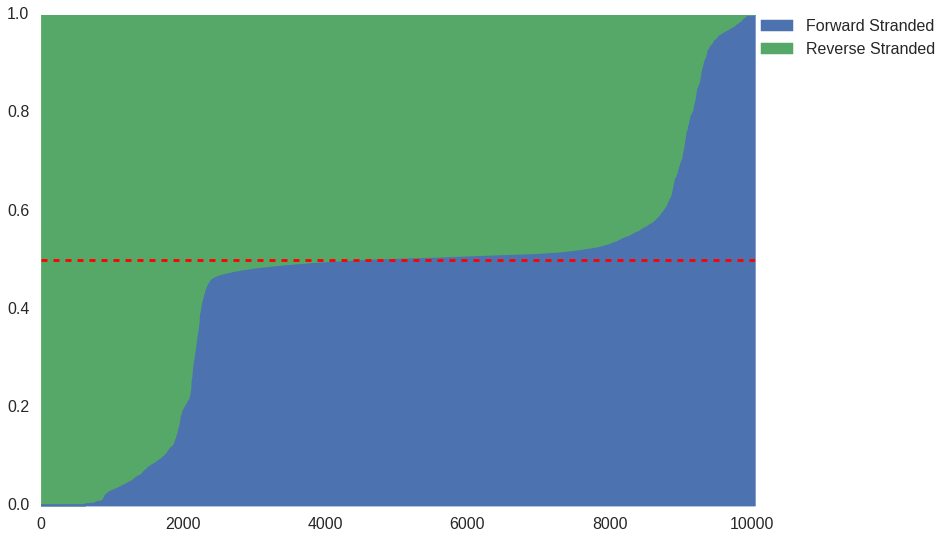

In [37]:
picard1['PCT_INCORRECT_STRAND_READS'] = 1 -  picard1['PCT_CORRECT_STRAND_READS']
ax = picard1[['PCT_CORRECT_STRAND_READS', 'PCT_INCORRECT_STRAND_READS']].plot.area(use_index=False, legend=False)
_ = ax.axhline(0.5, ls='--', color='r')
h, l = ax.get_legend_handles_labels()
_ = ax.legend(h, ['Forward Stranded', 'Reverse Stranded'], loc=(1, .9))
